In [1]:
# Step 1  unnecessary warnings during code execution (Always)
import warnings
warnings.filterwarnings('ignore')

# Step 2  Import pandas and Numpy Library
import pandas as pd
import numpy as np

# Deciding decimal places 
np.set_printoptions(precision=4, linewidth=100)

# matplot libarary for display data in graphical format
import matplotlib.pyplot as plt

In [2]:
#Step 3 Importing datafile and storing it into Pandas dataframe (Always)
Stock_df = pd.read_csv('Finance.csv')
Stock_df.head(10)

,Date,TCS,INFY,Nifty
0,01-Apr-20,1708.75,602.80,8253.80
1,03-Apr-20,1654.20,585.70,8083.80
2,07-Apr-20,1775.20,639.00,8792.20
3,08-Apr-20,1705.45,631.60,8748.75
4,09-Apr-20,1766.15,636.25,9111.90
5,13-Apr-20,1759.25,637.40,8993.85
6,15-Apr-20,1735.15,639.05,8925.30
7,16-Apr-20,1716.05,623.85,8992.80
8,17-Apr-20,1806.20,628.75,9266.75
9,20-Apr-20,1818.65,653.30,9261.85


In [3]:
# Step 4 information of data #
Stock_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    249 non-null    object 
 1   TCS     249 non-null    float64
 2   INFY    249 non-null    float64
 3   Nifty   249 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


Text(0, 0.5, 'TCS')

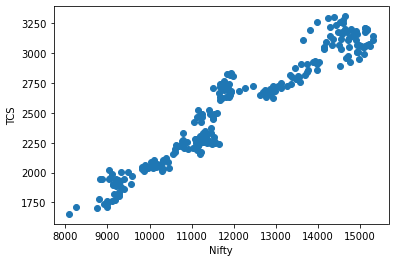

In [4]:
# Step 5  importing libraries for plotting the data(First Assumtion of LR Model is linearity bet x and y)
plt.scatter(Stock_df['Nifty'],Stock_df['TCS'])
plt.xlabel('Nifty')
plt.ylabel('TCS')

In [5]:
# Step 6 importing statmodel #
import statsmodels.api as sm

# Step 7 x is defined as independent variable (feature) #
X = sm.add_constant(Stock_df['Nifty'] ) 
X.head(5)

,const,Nifty
0,1.0,8253.80
1,1.0,8083.80
2,1.0,8792.20
3,1.0,8748.75
4,1.0,9111.90


In [6]:
# Step 8  Y is defined as dependent varibale(Target Variable) #
y = Stock_df['TCS']

In [7]:
# Step 9  importing library Sklearrn for ML model 
from sklearn.model_selection import train_test_split

In [8]:
# Step 10  splitting datset into train and test set
train_X, test_X, train_y, test_y = train_test_split( X ,y,train_size = 0.8,random_state = 100)

In [9]:
# Step 11  Fitting Linear Model Equation
TCS_lm = sm.OLS(train_y, train_X).fit()

In [10]:
# Step 12  Printing Result of Linear Regression Model #
print(TCS_lm.params) 

const   -150.887038
Nifty      0.222368
dtype: float64


In [11]:
# Step 13  Summary results of all the statistics of Linear Regression #
TCS_lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TCS   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2494.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):          8.44e-114
Time:                        20:29:51   Log-Likelihood:                -1237.8
No. Observations:                 199   AIC:                             2480.
Df Residuals:                     197   BIC:                             2486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -150.8870     53.925     -2.798      0.006    -257.232     -44.542
Nifty          0.2224      0.004     49.942      0.000       0.214       0.231
==============================================================================
Omnibus:                       21.142   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.015
Skew:                           0.863   Prob(JB):                     3.70e-06
Kurtosis:                       3.194   Cond. No.                     7.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Step 14 importing libraries for plotting the data 
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [14]:
# Step 15  importing libraries for plotting the data 
get_ipython().run_line_magic('matplotlib', 'inline')

<Figure size 432x288 with 0 Axes>

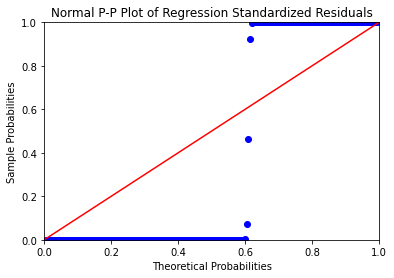

In [18]:
# Step 16 Check for Normal Distribution of Error
TCS_resid = TCS_lm.resid
probplot = sm.ProbPlot(TCS_resid )
plt.figure(figsize = (6, 4))
probplot.ppplot(line='45')
plt.title("Normal P-P Plot of Regression Standardized Residuals")
plt.show()
# straight line indicates Cummulative Normal Distribution 
# Doted line indicates Cummulative Distribution of Errors
#  dots are closer to the straight line which indicates that res follows normdis

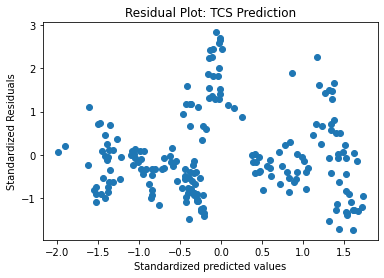

In [20]:
# Step 17 Test of Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter( get_standardized_values( TCS_lm.fittedvalues ),
    get_standardized_values( TCS_resid ) )
plt.title( "Residual Plot: TCS Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [21]:
# Step 18    Outlier Detection using zscore #
from scipy.stats import zscore 

In [22]:
Stock_df['z_score_TCS'] = zscore( Stock_df.TCS ) 

In [23]:
Stock_df[(Stock_df.z_score_TCS > 3.0)| (Stock_df.z_score_TCS < -3.0)] 

,Date,TCS,INFY,Nifty,z_score_TCS


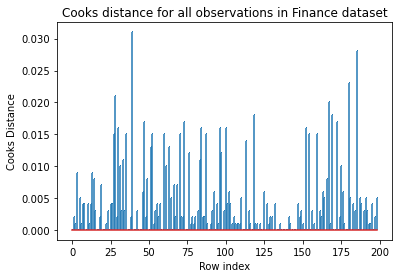

In [24]:
# Step 19    Outlier Detection using cook distance Assumption #
import numpy as np
TCS_influence = TCS_lm.get_influence() 
(c, p) = TCS_influence.cooks_distance 
plt.stem( np.arange( len(train_X) ), 
np.round( c, 3), 
markerfmt=","); 
plt.title("Cooks distance for all observations in Finance dataset"); 
plt.xlabel("Row index") 
plt.ylabel("Cooks Distance");

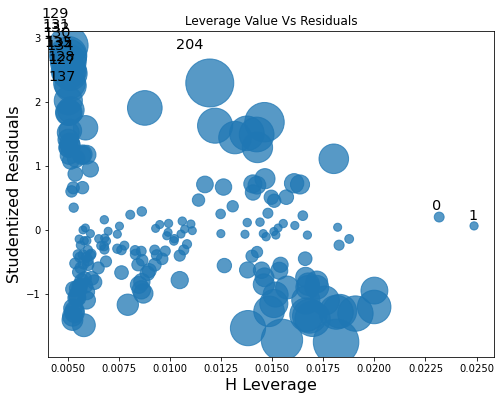

In [25]:
# Step 20    Outlier Detection using Leverage  Assumption Testing of outlier#
from statsmodels.graphics.regressionplots import influence_plot 
fig, ax = plt.subplots( figsize=(8,6)) 
influence_plot(TCS_lm, ax = ax) 
plt.title("Leverage Value Vs Residuals") 
plt.show();

In [26]:
# Step 21 Predicting on validation set 
pred_y = TCS_lm.predict(test_X)

In [27]:
# Step 22  Strength of relatinship using R Square and error #
#Finding R-Square and RMSE#
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
np.abs(r2_score(test_y, pred_y)) 

0.923008514594963

In [30]:
import numpy as np

In [31]:
# Finding root mean square error #
np.sqrt(mean_squared_error(test_y, pred_y))

124.0527230168714

In [32]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
# Predict the y values
pred_y = TCS_lm.predict(test_X ) 
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( TCS_lm,test_X,alpha = 0.1) 
# Store all the values in a dataframe
pred_y_df = pd.DataFrame({'Nifty Closing': test_X['Nifty'], 
'pred_y': pred_y, 
'pred_y_left': pred_y_low, 
'pred_y_right': pred_y_high })

In [33]:
pred_y_df[0:10] 

,Nifty Closing,pred_y,pred_y_left,pred_y_right
65,10813.45,2253.681980,2050.899749,2456.464212
59,10430.05,2168.425956,1965.507430,2371.344481
194,14484.75,3070.062898,2866.599945,3273.525852
112,11440.05,2393.017988,2190.374134,2595.661841
192,14137.35,2992.812134,2789.567253,3196.057015
169,13258.55,2797.394829,2594.558763,3000.230896
152,12631.10,2657.869809,2455.199847,2860.539771
203,14371.90,3044.968630,2841.580013,3248.357247
214,15109.30,3208.943050,3005.008035,3412.878066
173,13478.30,2846.260274,2643.341225,3049.179323
